### PCA
#### iris 

- from sklearn.decomposition import PCA

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
x = iris.data[ :, [0, 2]] # 꽃받침(sepal)의 길이와 꽃잎의 길이
y = iris.target

In [4]:
print(x.shape, y.shape)

(150, 2) (150,)


In [5]:
feature_name = [iris.feature_names[0], iris.feature_names[2]]
x_data = pd.DataFrame(x, columns = feature_name)
x_data.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [6]:
y_data = pd.DataFrame(y, columns = ["target"])
y_data.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components = 2) # 2차원
pca.fit(x_data)

PCA(n_components=2)

In [10]:
pca.explained_variance_ # 고유값

array([3.66189877, 0.1400726 ])

In [11]:
pca.components_ # 고유벡터

array([[ 0.39360585,  0.9192793 ],
       [-0.9192793 ,  0.39360585]])

In [13]:
PCscore = pca.transform(x_data) # PC score
PCscore[0 : 5]

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [14]:
x_data[0 : 5]

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [15]:
eigens_v = pca.components_.transpose()
print(eigens_v)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [17]:
mX = np.matrix(x)
for i in range(x.shape[1]):
    mX[:,i] = mX[:,i] - np.mean(x[:,i])
    
mX_df = pd.DataFrame(mX)

In [18]:
(mX * eigens_v)[0:5]

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

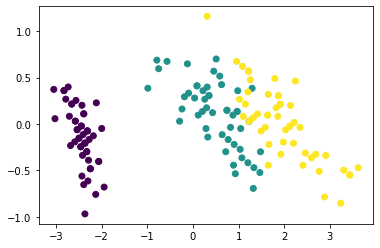

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(PCscore[:,0], PCscore[:,1], c=y)
plt.show()

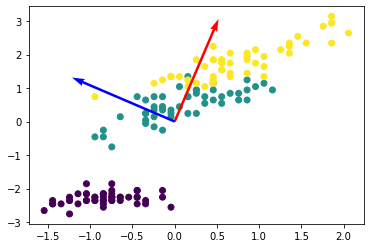

In [23]:
plt.scatter(mX_df[0], mX_df[1], c=y)
origin = [0], [0] #origin point
plt.quiver((0,0),(0,0), eigens_v[0,:], eigens_v[1,:], color = ['r', 'b'], scale = 3)
plt.show()

######## [참고] 혹시 PCA 축을 그릴 때 에러가 발생하면 origin 부분을 아래처럼 바꿔주세요. 

- plt.quiver(*origin     -->      plt.quiver((0,0),(0,0)  

- #### 회귀분석

- from sklearn.linear_model import LogisticRegression
- from sklearn.metrics import confusion_matrix

In [24]:
x2 = iris.data

pca2 = PCA(n_components = 4)
pca2.fit(x2)

PCA(n_components=4)

In [25]:
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [27]:
PCscore2 = pca2.transform(x2)[:,0:2]
PCscore2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [31]:
clf = LogisticRegression(solver = "sag", multi_class = "multinomial", max_iter = 10000).fit(x2,y)

In [32]:
clf2 = LogisticRegression(solver = "sag", multi_class = "multinomial").fit(PCscore2,y)

In [33]:
y_pred2 = clf2.predict(PCscore2)

In [34]:
y_pred = clf.predict(x2)

In [35]:
confusion_matrix(y, y_pred) # x2

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]], dtype=int64)

In [36]:
confusion_matrix(y, y_pred2) # PCscore2

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)